In [2]:
from _helper_basics_ import *
from _helper_gender_ import *
%reload_ext autoreload

## Gender Classification

In [1]:
import sys
## To get helper functions from another folder
# sys.path.insert(0, '../') # if _helper_basics_ is in previous folder
now_i_am_at = 'home' # home dso test
if now_i_am_at=='home': sys.path.insert(0, 'E:/Leonard HDD/Dropbox/DSO/Tasks/')
elif now_i_am_at=='dso': sys.path.insert(0, 'D:/Dropbox/DSO/Tasks')

from _helper_basics_ import *
from _helper_gender_ import *

%matplotlib inline
plt.rcParams['savefig.dpi'] = 100

%load_ext autoreload
%autoreload 2

print('keras',      keras.__version__)
print('tensorflow', tf.__version__)

Using TensorFlow backend.


keras 2.0.8
tensorflow 1.3.0


In [2]:
sr = 8000

nfft = 256
hop_length = nfft//3 # 256 = 30ms

num_freq,num_time,num_channel    = nfft//2+1,48,1 # 0.5 seconds speech is about 48 time_samples

print('nfft:{}'.format(nfft),'hop_length:{}'.format(hop_length),
      '\nnum_freq:{}'.format(num_freq),'num_time:{}'.format(num_time),'num_channel:{}'.format(num_channel))

Spect_Det = [nfft, hop_length, num_freq,num_time,num_channel]

pwd = os.getcwd()
Dataset_dir = os.path.join(pwd,'..','..','..','Speech Audio Text','3) Dataset')

nfft:256 hop_length:85 
num_freq:129 num_time:48 num_channel:1


In [3]:
pwd = os.getcwd() # 'D:\\Dropbox\\Meetup\\Deep Learning Developer Course\\Personal2_Gender_Audio_Classification'
Data_tdt = os.path.join(pwd,'Data_tdt')
trg_dir = os.path.join(Data_tdt,'train')
glob.glob(os.path.join(trg_dir,'*'))

['E:\\Leonard HDD\\Dropbox\\Meetup\\Deep Learning Developer Course\\Personal2_Gender_Audio_Classification\\Data_tdt\\train\\X_train',
 'E:\\Leonard HDD\\Dropbox\\Meetup\\Deep Learning Developer Course\\Personal2_Gender_Audio_Classification\\Data_tdt\\train\\X_train_lps',
 'E:\\Leonard HDD\\Dropbox\\Meetup\\Deep Learning Developer Course\\Personal2_Gender_Audio_Classification\\Data_tdt\\train\\X_train_wav',
 'E:\\Leonard HDD\\Dropbox\\Meetup\\Deep Learning Developer Course\\Personal2_Gender_Audio_Classification\\Data_tdt\\train\\Y_train']

In [4]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
set_session(tf.Session(config=config))

## Data_2

In [5]:
yf = np.asarray([0,1])
ym = np.asarray([1,0])

# X_train_wav = dump_load_pickle(os.path.join(pwd,'Data_tdt','train','X_train_wav'), 'load')
# X_train_lps = dump_load_pickle(os.path.join(pwd,'Data_tdt','train','X_train_lps'), 'load')
Y_train = dump_load_pickle(os.path.join(pwd,'Data_tdt','train','Y_train'), 'load')
X_train = dump_load_pickle(os.path.join(pwd,'Data_tdt','train','X_train'), 'load')

# X_val_wav = dump_load_pickle(os.path.join(pwd,'Data_tdt','val','X_val_wav'), 'load')
# X_val_lps = dump_load_pickle(os.path.join(pwd,'Data_tdt','val','X_val_lps'), 'load')
Y_val = dump_load_pickle(os.path.join(pwd,'Data_tdt','val','Y_val'), 'load')
X_val = dump_load_pickle(os.path.join(pwd,'Data_tdt','val','X_val'), 'load')

# X_test_wav = dump_load_pickle(os.path.join(pwd,'Data_tdt','test','X_test_wav'), 'load')
# X_test_lps = dump_load_pickle(os.path.join(pwd,'Data_tdt','test','X_test_lps'), 'load')
Y_test = dump_load_pickle(os.path.join(pwd,'Data_tdt','test','Y_test'), 'load')
X_test = dump_load_pickle(os.path.join(pwd,'Data_tdt','test','X_test'), 'load')

print('Y_train', Y_train.shape)
print('X_train', X_train.shape)
print('Y_val', Y_val.shape)
print('X_val', X_val.shape)
print('Y_test', Y_test.shape)
print('X_test', X_test.shape)

Y_train (9947, 2)
X_train (9947, 129, 48, 1)
Y_val (3266, 2)
X_val (3266, 129, 48, 1)
Y_test (3692, 2)
X_test (3692, 129, 48, 1)


In [6]:
indicies = np.arange(X_train.shape[0])
np.random.shuffle(indicies)
X_train,Y_train = X_train[indicies],Y_train[indicies]

indicies = np.arange(X_val.shape[0])
np.random.shuffle(indicies)
X_val,Y_val = X_val[indicies],Y_val[indicies]

indicies = np.arange(X_test.shape[0])
np.random.shuffle(indicies)
X_test,Y_test = X_test[indicies],Y_test[indicies]

female


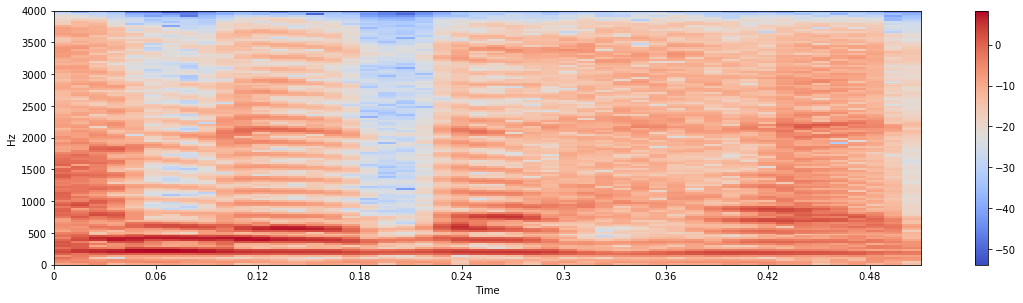

In [15]:
## Random batch observation

idx = np.random.randint(0,X_train.shape[0])

k=2;col=1;l=1; plt.figure(figsize=(16,4*k)); 
plt.subplot(k,col,l); display_audio(X_train[idx,:,:,0], None, sr, 'spec', hop_length=hop_length,colorbar=1); l+=1
plt.tight_layout()
if np.argmax(Y_train[idx])   == np.argmax(ym) : print('male')
elif np.argmax(Y_train[idx]) == np.argmax(yf) : print('female')

## Data_3

In [5]:
TIMIT_Gender_Folder = os.path.join(pwd, 'TIMIT_Gender')

# print( get_immediate_subdirectories(Data_3_dir) )
# trg_dir  = os.path.join(Data_3_dir, 'timit_train')
# print('len(trg_dir)',len(trg_dir))
# trg_path_list = glob.glob( os.path.join(trg_dir, '*.wav') )
# print('len(trg_path_list)',len(trg_path_list))
# trg_list = []
# for i in trg_path_list: trg_list.append( i[len(trg_dir)+1:] )
    
X_train_wav = dump_load_pickle(os.path.join(TIMIT_Gender_Folder,'train','X_train_wav'), 'load')
X_train_lps = dump_load_pickle(os.path.join(TIMIT_Gender_Folder,'train','X_train_lps'), 'load')
Y_train     = dump_load_pickle(os.path.join(TIMIT_Gender_Folder,'train','Y_train'), 'load')
X_train     = dump_load_pickle(os.path.join(TIMIT_Gender_Folder,'train','X_train'), 'load')

In [6]:
indices = np.arange(len(Y_train))
Y_train = Y_train[indices]
X_train = X_train[indices]
print('X_train_wav',len(X_train_wav))
print('X_train_lps',len(X_train_lps))
print('Y_train',Y_train.shape)
print('X_train',X_train.shape)

X_train_wav 4619
X_train_lps 4619
Y_train (40739, 2)
X_train (40739, 129, 48, 1)


# Setup

In [9]:
Archi_dir = "v1_2_FCN_limited/"
Weights_path = Archi_dir+"Logs/"
Ckpt_Mod_Weights_fold = Archi_dir+"Checkpoint_Model_Weights/"
plot_path_dir = Archi_dir+'Plots/'
if not os.path.exists(Archi_dir): os.mkdir(Archi_dir)
if not os.path.exists(Weights_path): os.mkdir(Weights_path)
if not os.path.exists(Ckpt_Mod_Weights_fold): os.mkdir(Ckpt_Mod_Weights_fold)
if not os.path.exists(plot_path_dir): os.mkdir(plot_path_dir)
print('Archi_dir',Archi_dir)
print('Weights_path',Weights_path)
print('Ckpt_Mod_Weights_fold',Ckpt_Mod_Weights_fold)
print('plot_path_dir',plot_path_dir)

Archi_dir v1_2_FCN_limited/
Weights_path v1_2_FCN_limited/Logs/
Ckpt_Mod_Weights_fold v1_2_FCN_limited/Checkpoint_Model_Weights/
plot_path_dir v1_2_FCN_limited/Plots/


# Training Params

In [7]:
Spect_Det

[256, 85, 129, 48, 1]

In [8]:
######################## Training Parameters ###############################
decay = 0;          	print('decay',decay)
steps_per_epoch = 500;	print('steps_per_epoch',steps_per_epoch)
epochs = 150;			print('epochs',epochs)
batch_size = 32;   		print('batch_size',batch_size)

decay 0
steps_per_epoch 500
epochs 150
batch_size 32


#### V1_1
    conv_list = [64]*4
    dense_list = [200, 200, 2]
    no max pooling
    only global pooling

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 129, 48, 1)        0         
_________________________________________________________________
0_Conv2D (Conv2D)            (None, 129, 48, 64)       640       
_________________________________________________________________
1_Conv2D (Conv2D)            (None, 129, 48, 64)       36928     
_________________________________________________________________
1_Pool (MaxPooling2D)        (None, 64, 24, 64)        0         
_________________________________________________________________
2_Conv2D (Conv2D)            (None, 64, 24, 64)        36928     
_________________________________________________________________
GlobalPool (GlobalAveragePoo (None, 64)                0         
_________________________________________________________________
3_Dense (Dense)              (None, 200)               13000     
__________

777/777 [==============================] - 6s - loss: 0.0644 - categorical_accuracy: 0.9755 - val_loss: 0.0854 - val_categorical_accuracy: 0.9590
Epoch 43/300
777/777 [==============================] - 6s - loss: 0.0802 - categorical_accuracy: 0.9653 - val_loss: 0.0893 - val_categorical_accuracy: 0.9744
Epoch 44/300
777/777 [==============================] - 6s - loss: 0.0695 - categorical_accuracy: 0.9743 - val_loss: 0.1002 - val_categorical_accuracy: 0.9692
Epoch 45/300
777/777 [==============================] - 6s - loss: 0.0575 - categorical_accuracy: 0.9820 - val_loss: 0.0876 - val_categorical_accuracy: 0.9744
Epoch 46/300
777/777 [==============================] - 6s - loss: 0.0571 - categorical_accuracy: 0.9820 - val_loss: 0.0761 - val_categorical_accuracy: 0.9641
Epoch 47/300
777/777 [==============================] - 6s - loss: 0.0620 - categorical_accuracy: 0.9794 - val_loss: 0.0785 - val_categorical_accuracy: 0.9744
Epoch 48/300
777/777 [==============================] - 6s 

777/777 [==============================] - 6s - loss: 0.0423 - categorical_accuracy: 0.9833 - val_loss: 0.0679 - val_categorical_accuracy: 0.9744
Epoch 94/300
777/777 [==============================] - 6s - loss: 0.0374 - categorical_accuracy: 0.9884 - val_loss: 0.0714 - val_categorical_accuracy: 0.9744
Epoch 95/300
777/777 [==============================] - 6s - loss: 0.0482 - categorical_accuracy: 0.9833 - val_loss: 0.0689 - val_categorical_accuracy: 0.9795
Epoch 96/300
777/777 [==============================] - 6s - loss: 0.0401 - categorical_accuracy: 0.9858 - val_loss: 0.0758 - val_categorical_accuracy: 0.9641
Epoch 97/300
777/777 [==============================] - 6s - loss: 0.0405 - categorical_accuracy: 0.9833 - val_loss: 0.0678 - val_categorical_accuracy: 0.9692
Epoch 98/300
777/777 [==============================] - 6s - loss: 0.0388 - categorical_accuracy: 0.9871 - val_loss: 0.0680 - val_categorical_accuracy: 0.9744
Epoch 99/300
777/777 [==============================] - 6s 

777/777 [==============================] - 6s - loss: 0.0344 - categorical_accuracy: 0.9897 - val_loss: 0.0690 - val_categorical_accuracy: 0.9590
Epoch 120/300
777/777 [==============================] - 6s - loss: 0.0394 - categorical_accuracy: 0.9846 - val_loss: 0.1206 - val_categorical_accuracy: 0.9487
Epoch 121/300
777/777 [==============================] - 6s - loss: 0.0384 - categorical_accuracy: 0.9858 - val_loss: 0.0749 - val_categorical_accuracy: 0.9744
Epoch 122/300
777/777 [==============================] - 6s - loss: 0.0317 - categorical_accuracy: 0.9923 - val_loss: 0.0674 - val_categorical_accuracy: 0.9641
Epoch 123/300
777/777 [==============================] - 6s - loss: 0.0341 - categorical_accuracy: 0.9884 - val_loss: 0.0666 - val_categorical_accuracy: 0.9692
Epoch 124/300
777/777 [==============================] - 6s - loss: 0.0363 - categorical_accuracy: 0.9910 - val_loss: 0.0694 - val_categorical_accuracy: 0.9795
Epoch 125/300
777/777 [==============================]

777/777 [==============================] - 6s - loss: 0.0354 - categorical_accuracy: 0.9910 - val_loss: 0.0700 - val_categorical_accuracy: 0.9795
Epoch 148/300
777/777 [==============================] - 6s - loss: 0.0331 - categorical_accuracy: 0.9884 - val_loss: 0.0847 - val_categorical_accuracy: 0.9692
Epoch 149/300
777/777 [==============================] - 6s - loss: 0.0329 - categorical_accuracy: 0.9884 - val_loss: 0.0678 - val_categorical_accuracy: 0.9590
Epoch 150/300
777/777 [==============================] - 6s - loss: 0.0487 - categorical_accuracy: 0.9781 - val_loss: 0.0759 - val_categorical_accuracy: 0.9744
Epoch 151/300
777/777 [==============================] - 6s - loss: 0.0332 - categorical_accuracy: 0.9871 - val_loss: 0.0661 - val_categorical_accuracy: 0.9641
Epoch 152/300
777/777 [==============================] - 6s - loss: 0.0390 - categorical_accuracy: 0.9846 - val_loss: 0.0691 - val_categorical_accuracy: 0.9795
Epoch 153/300
777/777 [==============================]

777/777 [==============================] - 6s - loss: 0.0221 - categorical_accuracy: 0.9910 - val_loss: 0.0750 - val_categorical_accuracy: 0.9641
Epoch 201/300
777/777 [==============================] - 6s - loss: 0.0229 - categorical_accuracy: 0.9910 - val_loss: 0.1024 - val_categorical_accuracy: 0.9590
Epoch 202/300
777/777 [==============================] - 6s - loss: 0.0329 - categorical_accuracy: 0.9858 - val_loss: 0.0665 - val_categorical_accuracy: 0.9744
Epoch 203/300
777/777 [==============================] - 6s - loss: 0.0222 - categorical_accuracy: 0.9923 - val_loss: 0.0740 - val_categorical_accuracy: 0.9590
Epoch 204/300
777/777 [==============================] - 6s - loss: 0.0233 - categorical_accuracy: 0.9910 - val_loss: 0.0680 - val_categorical_accuracy: 0.9692
Epoch 205/300
777/777 [==============================] - 6s - loss: 0.0234 - categorical_accuracy: 0.9910 - val_loss: 0.0723 - val_categorical_accuracy: 0.9590
Epoch 206/300
777/777 [==============================]

777/777 [==============================] - 6s - loss: 0.0202 - categorical_accuracy: 0.9923 - val_loss: 0.0773 - val_categorical_accuracy: 0.9692
Epoch 256/300
777/777 [==============================] - 6s - loss: 0.0207 - categorical_accuracy: 0.9923 - val_loss: 0.0825 - val_categorical_accuracy: 0.9641
Epoch 257/300
777/777 [==============================] - 6s - loss: 0.0188 - categorical_accuracy: 0.9936 - val_loss: 0.0851 - val_categorical_accuracy: 0.9641
Epoch 258/300
777/777 [==============================] - 6s - loss: 0.0190 - categorical_accuracy: 0.9923 - val_loss: 0.0685 - val_categorical_accuracy: 0.9744
Epoch 259/300
777/777 [==============================] - 6s - loss: 0.0151 - categorical_accuracy: 0.9949 - val_loss: 0.0834 - val_categorical_accuracy: 0.9641
Epoch 260/300
777/777 [==============================] - 6s - loss: 0.0163 - categorical_accuracy: 0.9936 - val_loss: 0.0745 - val_categorical_accuracy: 0.9692
Epoch 261/300
777/777 [==============================]

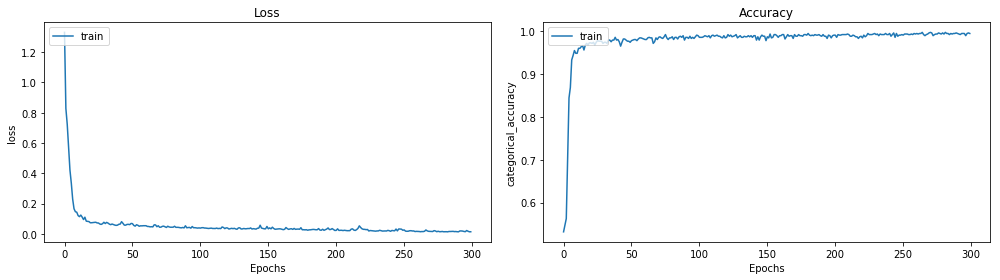

In [16]:
## First run that included alot of silences

In [17]:
save_or_load = 'save'
model_path = Weights_path+Archi_dir[:-1]+"_model_v1_1.json"
weights_path = Weights_path+Archi_dir[:-1]+"_weights_v1_1.h5"
if save_or_load == 'save':
    save_model(v1_1, model_path, weights_path)
elif save_or_load == 'load':
    _ = load_model(model_path, 'path', weights_path, 'final')
    _.summary()

Saved model : v1_FCN/Logs/v1_FCN_model_v1_1.json
Saved weights : v1_FCN/Logs/v1_FCN_weights_v1_1.h5


#### V1_2
    use v1_1 architecture to learn limited data of Data_3

In [15]:
save_or_load = 'save'
model_path = Weights_path+Archi_dir[:-1]+"_model_v1_1.json"
weights_path = Ckpt_Mod_Weights_fold+"v1_1/weights_v1_1_Epoch-0282_L-0.01.hdf5"
v1_2 = load_model(model_path, 'path', weights_path)
v1_2.summary()

Loaded model from path : v1_2_FCN_limited/Logs/v1_2_FCN_limited_model_v1_1.json
Loaded weights         : v1_2_FCN_limited/Checkpoint_Model_Weights/v1_1/weights_v1_1_Epoch-0282_L-0.01.hdf5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 129, 48, 1)        0         
_________________________________________________________________
0_Conv2D (Conv2D)            (None, 129, 48, 64)       640       
_________________________________________________________________
1_Conv2D (Conv2D)            (None, 129, 48, 64)       36928     
_________________________________________________________________
1_Pool (MaxPooling2D)        (None, 64, 24, 64)        0         
_________________________________________________________________
2_Conv2D (Conv2D)            (None, 64, 24, 64)        36928     
_________________________________________________________________
GlobalPool (GlobalAv

In [28]:
count_m,count_f = 0,0
y_train,y_val = [],[]
for idx in range(len(Y_train)):
    x,y = X
    if y[0]==1 : 
        count_m +=1
        if count_m >= len(Y_train)//10: y_val.append(y)
        else: y_train.append(y)
    else : 
        count_f += 1
        if count_f >= len(Y_train)//10: y_val.append(y)
        else: y_train.append(y)
len(Y_train), len(y_train), len(y_val)

(40739, 8144, 32595)

In [16]:
######################## Training Parameters ###############################
learning_rate = 1e-3;   print('learning_rate',learning_rate)
# adam_opt = Adam(lr=learning_rate, decay=decay)
sgd_opt = SGD(lr=learning_rate, momentum=0.9, decay=decay)
v1_2.compile(loss=categorical_crossentropy ,optimizer=sgd_opt, metrics=['categorical_accuracy'])
######################## Checkpoints ###############################
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=50, min_lr=1e-6, cooldown=50, epsilon=1e-05, verbose=1)
CkptFold_det = [  'v1_2',    Ckpt_Mod_Weights_fold, 'v1_2/']
ModelCheckpoint_det = ['val_categorical_accuracy',     1,            True,              False,           1] 
ckpt = ckpt_saving(CkptFold_det, ModelCheckpoint_det, save_all=True)
csv_log = CSVLogger(Weights_path+'v1_2_Trglog.txt', '\t')
plot_path = plot_path_dir+'v1_2.png'
########################### Actual training ##################################
try:
    history_v1_2 = v1_2.fit(X_train[:len(Y_train)//10],Y_train[:len(Y_train)//10], 
                            batch_size=32, epochs=60, verbose=1, 
                             validation_split = 0., validation_data=(X_train[len(Y_train)//10:],Y_train[len(Y_train)//10:]), # None (X_val,Y_val) (X_dev,Y_dev)
                             callbacks=[csv_log, ckpt] # reduce_lr
                            )
    plt.figure(figsize=(14,4))
#     plt.subplot(1,2,1);plot_loss(history_v1_2, metric_list=['loss'], title='Loss', plot_path=plot_path)
#     plt.subplot(1,2,2);plot_loss(history_v1_2, metric_list=['categorical_accuracy'], title='Accuracy', plot_path=plot_path)
    plt.subplot(1,2,1);plot_loss(history_v1_2, metric_list=['loss','val_loss'], title='Loss', plot_path=plot_path)
    plt.subplot(1,2,2);plot_loss(history_v1_2, metric_list=['categorical_accuracy','val_categorical_accuracy'], title='Accuracy', plot_path=plot_path)
    plt.tight_layout()
    
    save_or_load = 'save'
    model_path = Weights_path+Archi_dir[:-1]+"_model_v1_2.json"
    weights_path = Weights_path+Archi_dir[:-1]+"_weights_v1_2.h5"
    save_model(v1_2, model_path, weights_path)
except KeyboardInterrupt:
    print('\n\nKeyboardInterrupt')

learning_rate 0.001
ckpt_path :  v1_2_FCN_limited/Checkpoint_Model_Weights/v1_2/weights_v1_2_Epoch-{epoch:04d}_VCA-{val_categorical_accuracy:.2f}.hdf5 

Train on 4073 samples, validate on 36666 samples
Epoch 1/60
 992/4073 [======>.......................] - ETA: 26s - loss: 0.3683 - categorical_accuracy: 0.8700

KeyboardInterrupt
